Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Prelim Exam**
**Name** | Gamundoy, Jon Aviv Cloydd
**Name** | Pineda, Rachel Joy
**Section** | CPE32S3
**Date Performed**: | 3/02/2024
**Date Submitted**: | 3/06/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

# **Data Pre-processing**


## ***Training Dataset***

### *Student-mat.csv*

In [ ]:
# Import necessary libraries
import pandas as pd # For dataframes and operations
import numpy as np # For dealing with null values
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting
from scipy import stats # For computing statistics

data = pd.read_csv('student-mat.csv') # Read raw csv file

print(data.info()) # Check attributes and/or missing values

data.head() # Check contents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data Cleaning

In [ ]:
# Replace yes/no data with '0' and '1'
data["schoolsup"] = data["schoolsup"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["famsup"] = data["famsup"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["paid"] = data["paid"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["activities"] = data["activities"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["nursery"] = data["nursery"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["higher"] = data["higher"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["internet"] = data["internet"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

data["romantic"] = data["romantic"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

In [ ]:
# Verify changes
  # Isolate columns for verification
data.loc[:, ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [ ]:
# Replace School with binary values (GP = 0 | MS = 1)
data["school"] = data["school"].apply(lambda toLabel: 0 if toLabel == 'GP' else 1)

# Replace Gender with binary values (F = 0 | M = 1)
data["sex"] = data["sex"].apply(lambda toLabel: 0 if toLabel == 'F' else 1)

# Replace Address with binary values (U = 0 | R = 1)
data["address"] = data["address"].apply(lambda toLabel: 0 if toLabel == 'U' else 1)

# Replace Family Size with binary values (LE3 = 0 | GT3 = 1)
data["famsize"] = data["famsize"].apply(lambda toLabel: 0 if toLabel == 'LE3' else 1)

# Replace Parent Cohabitation Status with binary values (T = 0 | A = 1)
data["Pstatus"] = data["Pstatus"].apply(lambda toLabel: 0 if toLabel == 'T' else 1)

# Replace Parent's Occupation with numerical values (teacher = 0 | health = 1 | services = 2 | at_home = 3 | other = 4)
  # Identify the word to be replaced and values to replace it with
replacements = {'teacher': '0', 'health': '1', 'services': '2', 'at_home': '3', 'other': '4'}

  # Use the .map() function to replace the words with numerical values
data["Mjob"] = data["Mjob"].map(replacements).fillna(data["Mjob"])

  # Repeat with Father
data["Fjob"] = data["Fjob"].map(replacements).fillna(data["Fjob"])

In [ ]:
# Verify changes
  # Isolate columns for verification
data.loc[:, ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob']].head(20)

,school,sex,address,famsize,Pstatus,Mjob,Fjob
0,0,0,0,1,1,3,0
1,0,0,0,1,0,3,4
2,0,0,0,0,0,3,4
3,0,0,0,1,0,1,2
4,0,0,0,1,0,4,4
5,0,1,0,0,0,2,4
6,0,1,0,0,0,4,4
7,0,0,0,1,1,4,0
8,0,1,0,0,1,2,4
9,0,1,0,1,0,4,4


### Data Verification

In [ ]:
# Data Attribute Verification
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    int64 
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int64 
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    int64 
 19  nursery     395 non-null    int64 
 20  higher    

In [ ]:
# Data Content Verification
data.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,0,0,0,4,3,2,4,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,0,0,0,2,2,4,4,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,0,1,1,4,4,4,0,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,0,0,1,3,2,2,4,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,0,1,0,3,4,4,4,...,5,5,1,1,1,5,0,14,15,15


## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Testing Dataset**

### *Student-test.csv*

In [ ]:
test = pd.read_csv('student-test.csv') # Read raw csv file

print(test.info()) # Check attributes and/or missing values

test.head() # Check contents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Data Cleaning

In [ ]:
# Replace yes/no data with '0' and '1'
test["schoolsup"] = test["schoolsup"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["famsup"] = test["famsup"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["paid"] = test["paid"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["activities"] = test["activities"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["nursery"] = test["nursery"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["higher"] = test["higher"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["internet"] = test["internet"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

test["romantic"] = test["romantic"].apply(lambda toLabel: 0 if toLabel == 'no' else 1)

In [ ]:
# Verify changes
  # Isolate columns for verification
test.loc[:, ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,0
3,0,1,0,1,1,1,1,1
4,0,1,0,0,1,1,0,0


In [ ]:
# Replace School with binary values (GP = 0 | MS = 1)
test["school"] = test["school"].apply(lambda toLabel: 0 if toLabel == 'GP' else 1)

# Replace Gender with binary values (F = 0 | M = 1)
test["sex"] = test["sex"].apply(lambda toLabel: 0 if toLabel == 'F' else 1)

# Replace Address with binary values (U = 0 | R = 1)
test["address"] = test["address"].apply(lambda toLabel: 0 if toLabel == 'U' else 1)

# Replace Family Size with binary values (LE3 = 0 | GT3 = 1)
test["famsize"] = test["famsize"].apply(lambda toLabel: 0 if toLabel == 'LE3' else 1)

# Replace Parent Cohabitation Status with binary values (T = 0 | A = 1)
test["Pstatus"] = test["Pstatus"].apply(lambda toLabel: 0 if toLabel == 'T' else 1)

# Replace Parent's Occupation with numerical values (teacher = 0 | health = 1 | services = 2 | at_home = 3 | other = 4)
  # Identify the word to be replaced and values to replace it with
replacements = {'teacher': '0', 'health': '1', 'services': '2', 'at_home': '3', 'other': '4'}

  # Use the .map() function to replace the words with numerical values
test["Mjob"] = test["Mjob"].map(replacements).fillna(data["Mjob"])

  # Repeat with Father
test["Fjob"] = test["Fjob"].map(replacements).fillna(data["Fjob"])

In [ ]:
# Verify changes
  # Isolate columns for verification
test.loc[:, ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob']].head(20)

,school,sex,address,famsize,Pstatus,Mjob,Fjob
0,0,0,0,1,1,3,0
1,0,0,0,1,0,3,4
2,0,0,0,0,0,3,4
3,0,0,0,1,0,1,2
4,0,0,0,1,0,4,4
5,0,1,0,0,0,2,4
6,0,1,0,0,0,4,4
7,0,0,0,1,1,4,0
8,0,1,0,0,1,2,4
9,0,1,0,1,0,4,4


### Data Verification

In [ ]:
# Test Attribute Verification
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    int64 
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    int64 
 4   famsize     649 non-null    int64 
 5   Pstatus     649 non-null    int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

In [ ]:
# Test Content Verification
test.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13
5,0,1,16,0,0,0,4,3,2,4,...,5,4,2,1,2,5,6,12,12,13
6,0,1,16,0,0,0,2,2,4,4,...,4,4,4,1,1,3,0,13,12,13
7,0,0,17,0,1,1,4,4,4,0,...,4,1,4,1,1,1,2,10,13,13
8,0,1,15,0,0,1,3,2,2,4,...,4,2,2,1,1,1,0,15,16,17
9,0,1,15,0,1,0,3,4,4,4,...,5,5,1,1,1,5,0,12,12,13


# ---------------------------------------------------------------------------------------------------------------------------------------------

# **Linear Regression**


## ***Singular Linear Regression***


In [ ]:
corr_matrix = data[['studytime', 'failures', 'schoolsup', 'higher', 'romantic', 'famrel', 'health', 'absences', 'G3']].corr()

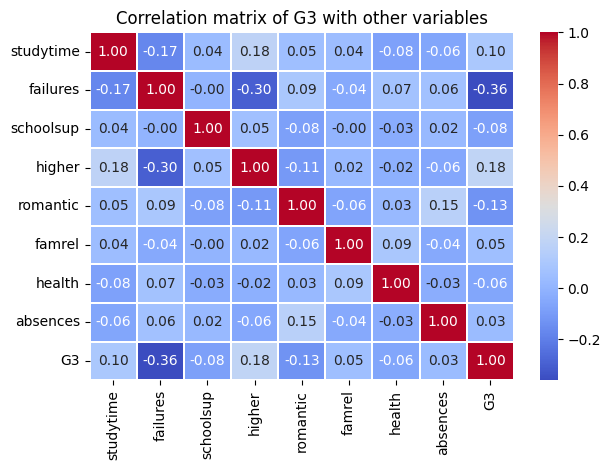

In [ ]:
# creating a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)

# adding labels and title
plt.title("Correlation matrix of G3 with other variables")
plt.tight_layout()
plt.show()

The variables that we want to identify are "studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", and "absences". The diagonal elements of the matrix are all 1, as a variable is always perfectly correlated with itself. The other values in the matrix represent the correlation coefficients between the different variables. For example, the value of -0.173563 in the "studytime" row and "failures" column indicates a weak negative correlation between "studytime" and "failures".

### Create a Linear Regression Model

In [ ]:
# Import required libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target variable
X = data[['studytime']]  # Independent variables
y = data['G3']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Create a linear regression model and fit it
LinR = LinearRegression()
LinR.fit(input, target_var)

# Use the fitted model to make predictions
predictions = LinR.predict(input)

# Create a new DataFrame that includes the predicted value and actual value (for checking purposes)
predictions = pd.DataFrame({"Prediction": predictions, "Actual Value": target_var})

# Display the prediction dataframe
print(predictions.head())


   Prediction  Actual Value
0   10.396263             6
1   10.396263             6
2   10.396263            10
3   10.930264            15
4   10.396263            10


### Apply the Linear Regression Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Select the features the model will base on for prediction
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# Load the values of the features
x_input = data[list(attributes)].values

# Apply the model on the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_input)

# Select the target variable
y_target = data["G3"].values

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_target, test_size=0.2, random_state=42)

# Apply the model on the training dataset
model = LinearRegression()
model.fit(x_train, y_train)

# Apply the model on the testing dataset
predictions = model.predict(x_test)

# Create a new DataFrame that includes the predicted value and actual value (for checking purposes)
predictions = pd.DataFrame({"Prediction": predictions, "Actual Value": y_test})

# Display the prediction dataframe
predictions.head(25)

,Prediction,Actual Value
0,1.939016,10
1,8.133564,12
2,8.520085,5
3,11.188151,10
4,8.023107,9
5,10.956217,13
6,11.178688,18
7,11.787335,6
8,11.862462,0
9,11.584314,14


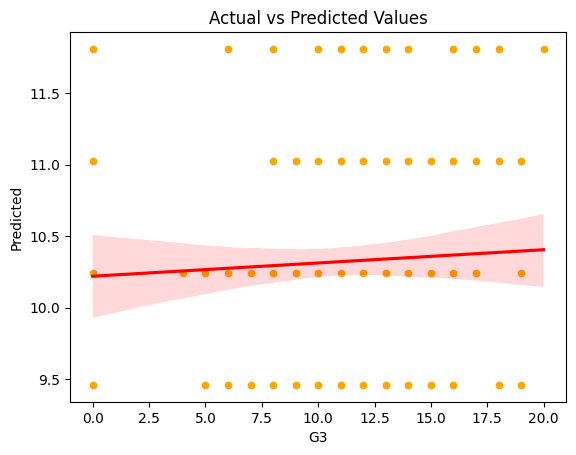

In [ ]:
# Plot actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='orange')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

# Plot regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

### Evaluation of Linear Regression Model

The code provides a simple linear regression model that can predict the value of the dependent variable 'G3' based on the independent variable 'studytime'. In the table, 'y_test' represent the actual values, and 'y_pred' represent the predicted values. The scatterplot show that the actual values on the x-axis and the predicted values on the y-axis, with each point representing an observation. The regression line will then be fit to these points to show the general trend of the data. The regression line may have a negative slope, as the actual values appear to be lower than the predicted values. The scatterplot may show a pattern where the predicted values are generally higher than the actual values, suggesting that the model may be overestimating the actual values.

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## ***Multiple Linear Regression***


### Create a Multiple Linear Regression Model

In [ ]:
#Import data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

#Import model libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#Import Metrics libraries:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Define predictors and target variable
X = data[['studytime', 'failures', 'schoolsup', 'higher', 'romantic', 'famrel', 'health', 'absences']]  # Independent variables
y = data['G3']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=23)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Apply the Multiple Linear Regression Model

Mean Squared Error: 19.089004110475752
R-squared Score: 0.05774972911304077


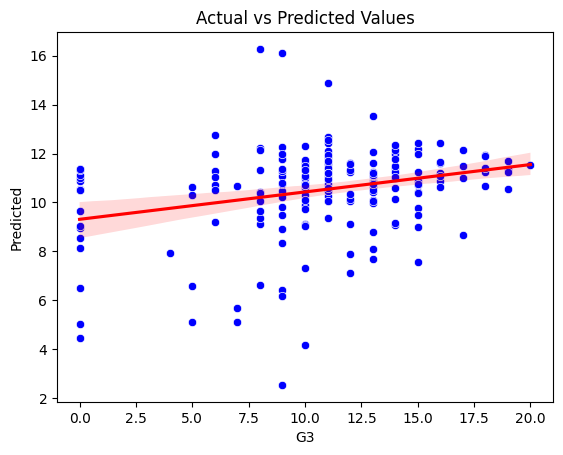

In [ ]:
# Note: The Mean Squared Error (MSE) is a measure of the quality of the predictor.
##It is the average squared difference between the estimated values and the actual value.
# Note: The R-squared Score is a statistical measure that represents the proportion of the variance
##for a dependent variable that's explained by an independent variable or variables in a regression model.
# Note: The scatterplot shows the actual values (y_test) against the predicted values (y_pred).
# Note: The regression line is a straight line that best fits the data points. It is a line of best fit
##that minimizes the sum of the squared differences between the actual values and the predicted values.

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

# Plot actual vs predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')

# Plot regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

### Evaluation of Multiple Linear Regression Model

The R-squared Score is a measure of how well the independent variables in a regression model explain the variance in the dependent variable. It ranges from 0 to 1, where 1 indicates perfect explanation and 0 means no explanation. In this case, the R-squared Score is 0.0577, indicating that only a small fraction of the variance is explained by the independent variables. This suggests that the multiple linear regression model is not accurate in predicting the dependent variable. The high MSE further confirms the presence of unexplained variance. Hence, exploring additional variables or alternative models might improve predictions.

## ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## ***Polynomial Linear Regression***

### Create a Polynomial Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Identify the target variable to predict
target_var = data["G3"]

# Select the features the model will base on for prediction
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# Load the values of the features
input = data[list(attributes)].values

In [ ]:
LinR = LinearRegression()
LinR.fit(input, target_var)

LinearRegression()

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

PLR = PolynomialFeatures(degree=3)
Pinput = PLR.fit_transform(input)

PLR.fit(Pinput, target_var)
LinR2 = LinearRegression()
LinR2.fit(Pinput, target_var)


LinearRegression()

In [ ]:
print(LinR.score(input, target_var))
print(LinR2.score(Pinput, target_var))

0.16324591796647403
-1.906278982376222


### Apply the Polynomial Linear Regression Model

In [ ]:
# Select the features the model will base on for prediction
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# Load the values of the features
x_input = test[list(attributes)].values

# Apply the model on the test dataset
predictions = LinR2.predict(PLR.fit_transform(x_input))

# Create a new DataFrame that includes the predicted value and actual value (for checking purposes)
predictions = pd.DataFrame({"Prediction": predictions, "Actual Value": test["G3"]})

# Display the prediction dataframe
predictions.head(25)

,Prediction,Actual Value
0,3.245930,11
1,11.533730,11
2,4.429955,12
3,11.318359,14
4,11.629276,13
5,16.747768,13
6,6.588108,13
7,11.452629,13
8,11.852386,17
9,15.459606,13


In [ ]:
from sklearn.metrics import mean_absolute_error as abs_err

# Using the Mean Absolute Error to evaluate the model
abs_err(predictions["Actual Value"], predictions["Prediction"])

10.018544560037151

### Evaluation of Polynomial Linear Regression Model

The MAE is approximately  10.02. It implies that, on average, the model's predictions are off by about 10 grade points. This level of prediction error suggests that the model might not be capturing all the nuances of the relationship between the selected features and the final grade (G3).

# ---------------------------------------------------------------------------------------------------------------------------------------------

# **Logistic Regression**

## Create a Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Identify the target variable to predict
target_var = data["G3"]

# Select the features the model will base on for prediction
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# Load the values of the features
input = data[list(attributes)].values

In [ ]:
# Create a Logistic Regression Object
LR = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'ovr')

# Note: random_state determines the random seed that will be used, a fixed value ensures reproducability
# Note: solver determines the optimization algorithm that Logistic Regression will use, lbfgs is "Limited-memory Broyden-Fletcher-Goldfarb-Shanno"
# Note: multi_class determines multiclass classification handling, ovr means One-vs-Rest, where binary problem is fit for each class

# Fit the model with the dataset
LR.fit(input, target_var)

# Display the score of the trained dataset
LR.score(input, target_var)

0.2481012658227848

## Apply the Logistic Regression Model

In [ ]:
# Select the features the model will base on for prediction
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# Load the values of the features
x_input = test[list(attributes)].values

# Apply the Logistic Regression Model on the test dataset
predictions = LR.predict(x_input)

# Create a new DataFrame that includes the predicted value and actual value (for checking purposes)
predictions = pd.DataFrame({"Prediction": predictions, "Actual Value": test["G3"]})

# Display the prediction dataframe
predictions.head(25)

,ID,Prediction,Actual Value
0,0,10,11
1,1,10,11
2,2,10,12
3,3,0,14
4,4,0,13
5,5,10,13
6,6,0,13
7,7,10,13
8,8,0,17
9,9,10,13


In [ ]:
# Display the accuracy of the model of both training and test data sets
print("Training score:" + str(LR.score(input, target_var)))
print("Testing score:" + str(LR.score(x_input, test["G3"])))

Training score:0.2481012658227848
Testing score:0.12172573189522343


In [ ]:
from sklearn import metrics

# Normalize the data
predictions["Actual Value"] = predictions["Actual Value"].apply(lambda toLabel: 0 if toLabel < 10 else 1)
predictions["Prediction"] = predictions["Prediction"].apply(lambda toLabel: 0 if toLabel < 10 else 1)

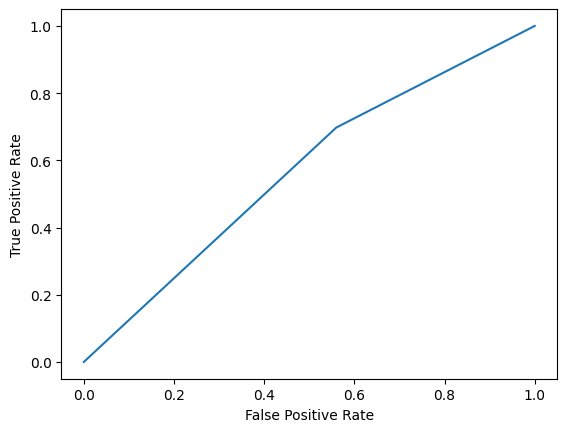

In [ ]:
# Visualize the data
fpr, tpr, _ = metrics.roc_curve(predictions["Actual Value"], predictions["Prediction"])

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The plot generated from the code displays the Receiver Operating Characteristic (ROC) curve. This curve illustrates the True Positive Rate (TPR) on the y-axis and the False Positive Rate (FPR) on the x-axis. Each point on the curve represents a sensitivity/specificity pair corresponding to a particular discrimination threshold.

The proximity of the curve to the top-left corner indicates higher test accuracy. A curve closer to the 45-degree line suggests a weaker model, while further deviation from this line signifies better class distinction.

In summary, the ROC curve visually assesses the model's ability to distinguish between positive and negative classes, with closer proximity to the top-left corner indicating superior performance.

## Evaluation of Logistic Regression Model

The accuracy for the training dataset is 0.248, and for the testing dataset, it is 0.122. Accuracy measures the proportion of correct predictions out of the total predictions made by the model. A low testing score (0.122) suggests overfitting to the training data and poor generalization to unseen data. This may result from a complex model with many parameters or a small dataset. To mitigate overfitting, techniques like regularization, cross-validation, and simplifying the model can be employed.


# ---------------------------------------------------------------------------------------------------------------------------------------------

# **Decision Tree**

## Creating a Decision Tree

In [ ]:
# Import necessary libraries and packages
from sklearn import tree
from six import StringIO
from IPython.display import Image

# Set the target variable along with its data
target_var = data["G3"].values

# Identify the input variables
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# List the input variable data
input = data[list(attributes)].values

In [ ]:
# Create a decision tree classifier object
dec_tree = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)

# Note: "Entropy" represents the criterion in which the tree bases its decision or prediction
# Note: max_depth represents how many 'children' does the root node can have.

# Train the object using the fit() function and passing the input and target variable
dec_tree = dec_tree.fit(input, target_var)

# Evaluation of model through its accuracy
dec_tree.score(input, target_var)

0.22025316455696203

In [ ]:
# Convert the decision tree into an image
with open("decision.dot", 'w') as y:
  y = tree.export_graphviz(dec_tree, out_file = y, feature_names = attributes)

In [ ]:
# Convert the dot file to a png
!dot -Tpng decision.dot -o decision.png

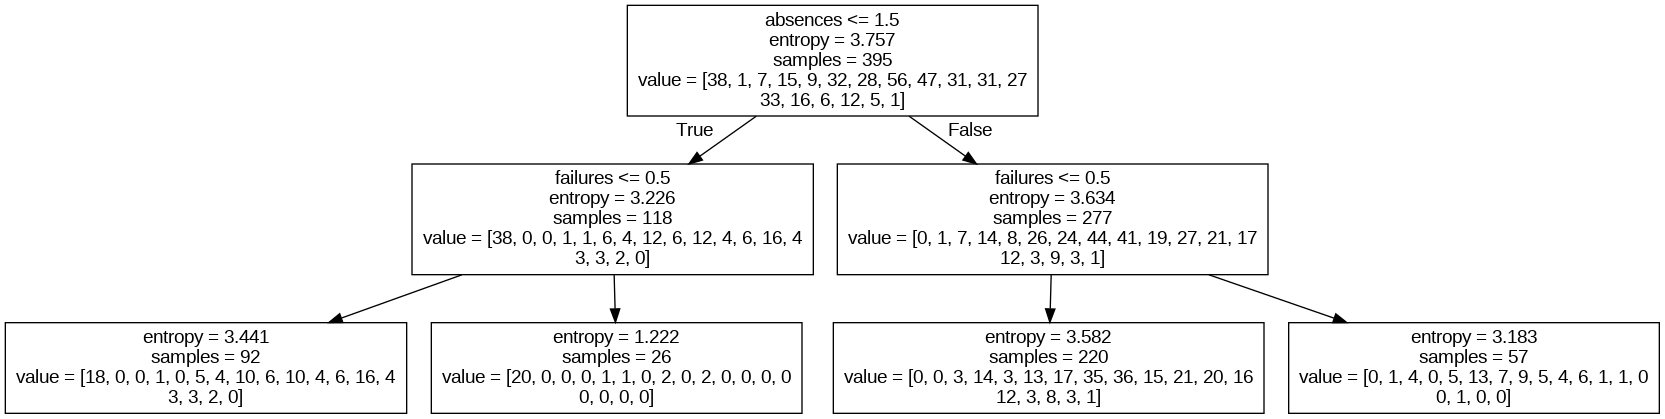

In [ ]:
# Display the image
Image("decision.png")

It's determining the best attribute to split the data based on entropy reduction. Entropy measures data impurity, ranging from 0 to 4.5. Lower entropy indicates clearer separation of classes. For each attribute, entropy is calculated for different conditions. The attribute with the lowest entropy becomes the split. This process repeats, forming a tree. The resulting tree aids in classification or regression tasks by maximizing class separation.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    int64 
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    int64 
 4   famsize     395 non-null    int64 
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int64 
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    int64 
 19  nursery     395 non-null    int64 
 20  higher    

## Apply the Decision Tree

In [ ]:
# Identify the attributes of the input variables
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# List the values of the input variables
x_input = test[list(attributes)].values

In [ ]:
# Apply the trained model to the input variables
prediction = dec_tree.predict(x_input)

# Create a new dataframe containing the prediction and actual value (for checking purposes)
prediction = pd.DataFrame({"Prediction": prediction, "Actual Value": test["G3"]})

# Display the new dataframe
prediction.head(25)

,Prediction,Actual Value
0,11,11
1,11,11
2,11,12
3,0,14
4,0,13
5,11,13
6,0,13
7,11,13
8,0,17
9,0,13


In [ ]:
# Display the accuracy of the model of both training and test data sets
print("Training score:" + str(dec_tree.score(input, target_var)))
print("Testing score:" + str(dec_tree.score(x_input, test["G3"])))

Training score:0.22025316455696203
Testing score:0.14329738058551617


## Evaluation of the Decision Tree


RThe model's training score is 0.22, indicating it correctly predicts the target variable only 22% of the time on the training data. The testing score is lower at 0.14, suggesting it performs even worse on unseen test data. Possible reasons for poor performance include overfitting, where the model learns noise instead of underlying patterns, possibly due to too many features, complexity, or insufficient training data.

# ---------------------------------------------------------------------------------------------------------------------------------------------

# **Random Forest**

## Creating a Random Forest Model

In [ ]:
# Import the necessary libraries/packages
import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select the target variable
target_var = data["G3"].values

# Determine the attributes
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# List the values of the attributs
input = data[list(attributes)].values

In [ ]:
# Creating a Random Forest object
RF = RandomForestRegressor(n_estimators = 10, random_state = 0, oob_score = True)

# Note: n_estimators determines the amount of decision trees to be made
# Note: random_state determines the random seed of the algorithm so it can be replicated
# Note: oob_score is the out-of-bag score that uses values outside the training data

# Fit the data to the object
RF.fit(input, target_var)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
# Evaluating the test model
print("Out of bag score: " + str(RF.oob_score_))
print("Accuracy of the model: " + str(RF.score(input, target_var)))

Out of bag score: -0.03616152229815728
Accuracy of the model: 0.7483847555244129


## Apply the Random Forest Model

In [ ]:
# Determine the attributes
attributes = ["studytime", "failures", "schoolsup", "higher", "romantic", "famrel", "health", "absences"]

# List the values of the attributs
x_input = test[list(attributes)].values

# Apply the test model to the test dataset
predictions = RF.predict(x_input)

# Create a new dataframe containing the prediction and actual value (for checking purposes)
predictions = pd.DataFrame({"Prediction": predictions, "Actual Value": test["G3"]})

# Display the new dataframe
predictions.head(25)

,Prediction,Actual Value
0,7.100000,11
1,11.391667,11
2,6.000000,12
3,9.061667,14
4,12.495238,13
5,11.660000,13
6,10.525000,13
7,8.700000,13
8,15.248333,17
9,10.707619,13


In [ ]:
# Evaluate the test model
# Display the accuracy of the model of both training and test data sets
print("Training score:" + str(RF.score(input, target_var)))
print("Testing score:" + str(RF.score(x_input, test["G3"])))

Training score:0.7483847555244129
Testing score:-0.41799889300236304


In [ ]:
from sklearn import metrics

# Normalize the data
predictions["Actual Value"] = predictions["Actual Value"].apply(lambda toLabel: 0 if toLabel < 10 else 1)
predictions["Prediction"] = predictions["Prediction"].apply(lambda toLabel: 0 if toLabel < 10 else 1)

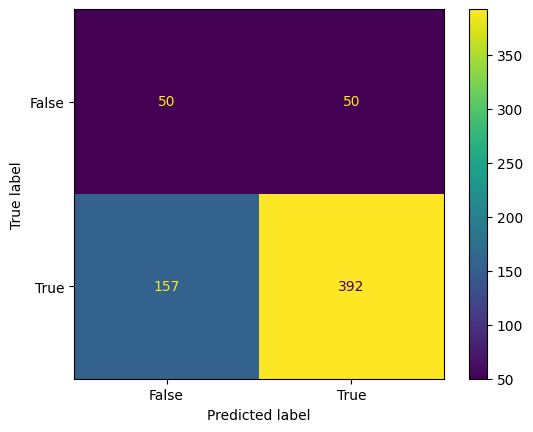

In [ ]:
# Visualize the data
confusion_matrix = metrics.confusion_matrix(predictions["Actual Value"], predictions["Prediction"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

The confusion matrix reveals the model's effectiveness in predicting the "G3" attribute. Diagonal elements indicate correct predictions, while off-diagonal elements signify incorrect ones. Model accuracy is computed as the ratio of correct predictions to the total predictions.

## Evaluation of Random Forest Model

The model trained on the training dataset predicts the "G3" attribute (grade) for the test dataset. Its accuracy is evaluated by comparing predicted values with actual values. The model achieves an accuracy of 74.8% on the training dataset but performs poorly on the test dataset, with an accuracy of -0.418, indicating ineffectiveness in predicting "G3" for the test dataset.